In [58]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

In [59]:
df=pd.read_csv('diabetes.csv')

In [60]:
df.head()
missing_values = df.isnull()
missing_values.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [61]:
df['Pregnancies']

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

In [62]:
X=df.drop(['Outcome'],axis='columns')
Y=df['Outcome']


In [63]:
#Training and Testing of Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
len(x_test)

154

In [64]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        94
           1       0.82      0.47      0.60        60

    accuracy                           0.75       154
   macro avg       0.78      0.70      0.71       154
weighted avg       0.77      0.75      0.73       154



C:\Users\Rushabh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
#Decision Tree
model=tree.DecisionTreeClassifier(criterion='gini',max_depth=5)

In [66]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [67]:
DTC=model.predict(x_test)

In [69]:
y=model.score(x_test,y_test)
y

0.7597402597402597

In [28]:
#Classification Report for Decision Tree
from sklearn.metrics import classification_report
report = classification_report(y_test, DTC)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        96
           1       0.61      0.62      0.62        58

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



In [29]:
len(x_test)

154

In [30]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [31]:
model2=GaussianNB()

In [32]:
model2.fit(x_train,y_train)

GaussianNB()

In [70]:
NB=model2.predict(x_test)
x=model2.score(x_test,y_test)
x



0.7857142857142857

In [34]:
#Report of Naive Bayes
from sklearn.metrics import classification_report
report = classification_report(y_test, NB)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        96
           1       0.68      0.66      0.67        58

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.75      0.75      0.75       154



<BarContainer object of 2 artists>

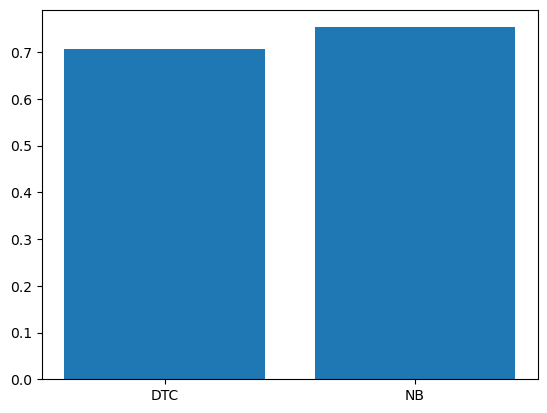

In [35]:
#Comparison of DTC & NB
plt.bar(['DTC','NB'],[y,x])

In [36]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sn

In [37]:
cm=confusion_matrix(y_test,DTC)

In [38]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)

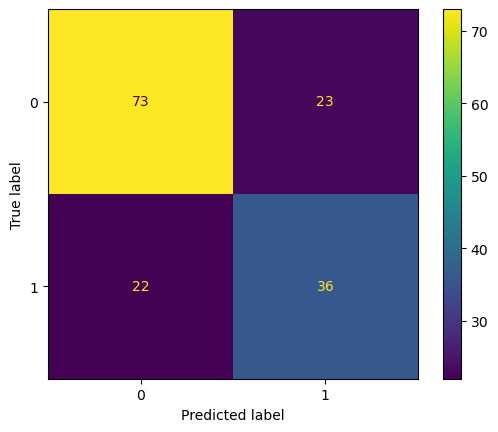

In [39]:
disp.plot()

In [40]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [41]:
num_folds = 5

In [42]:
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [43]:
model = RandomForestClassifier() 

In [44]:
scores = cross_val_score(model, X, Y, cv=kf, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.77922078 0.79220779 0.77272727 0.76470588 0.73856209]
Mean accuracy: 0.7694847636024107


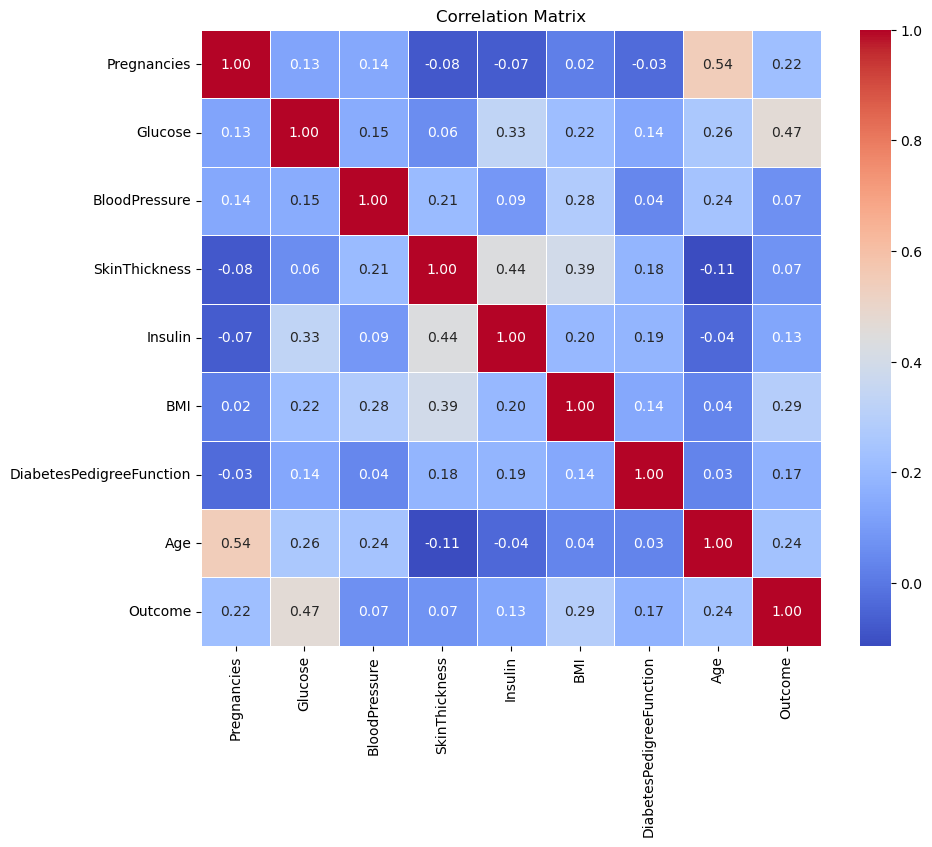

In [45]:
corr_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\Rushabh\AppData\Local\Temp\ipykernel_12272\784681580.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Pregnancies'], shade=True)


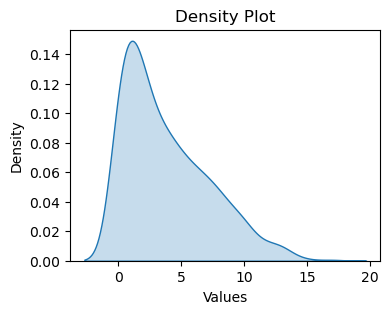

In [51]:
plt.figure(figsize=(4, 3))
sns.kdeplot(df['Pregnancies'], shade=True)
plt.title('Density Plot')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

C:\Users\Rushabh\AppData\Local\Temp\ipykernel_12272\3329706186.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Glucose'], shade=True)


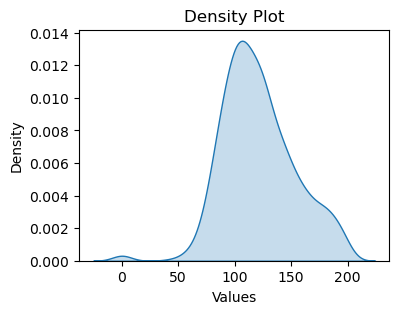

In [52]:
plt.figure(figsize=(4, 3))
sns.kdeplot(df['Glucose'], shade=True)
plt.title('Density Plot')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

C:\Users\Rushabh\AppData\Local\Temp\ipykernel_12272\2985644508.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True)


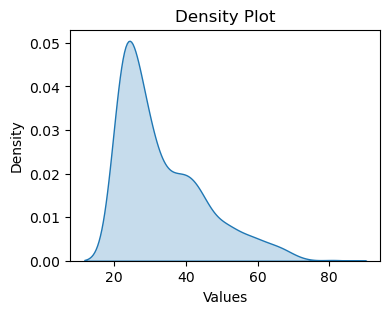

In [53]:
plt.figure(figsize=(4, 3))
sns.kdeplot(df['Age'], shade=True)
plt.title('Density Plot')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

C:\Users\Rushabh\AppData\Local\Temp\ipykernel_12272\889047819.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Insulin'], shade=True)


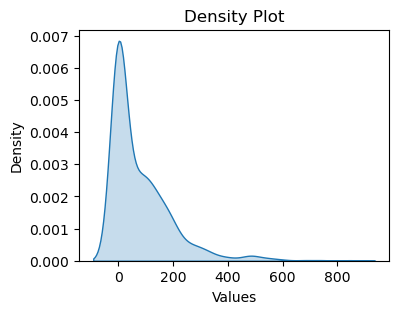

In [54]:
plt.figure(figsize=(4, 3))
sns.kdeplot(df['Insulin'], shade=True)
plt.title('Density Plot')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

C:\Users\Rushabh\AppData\Local\Temp\ipykernel_12272\2088028049.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['BloodPressure'], shade=True)


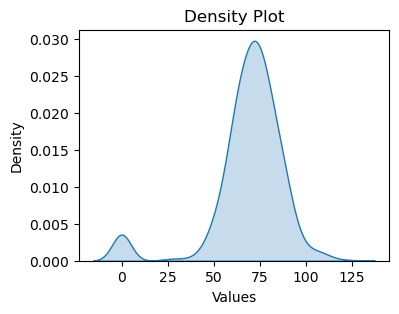

In [55]:
plt.figure(figsize=(4, 3))
sns.kdeplot(df['BloodPressure'], shade=True)
plt.title('Density Plot')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

C:\Users\Rushabh\AppData\Local\Temp\ipykernel_12272\3782081758.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['BMI'], shade=True)


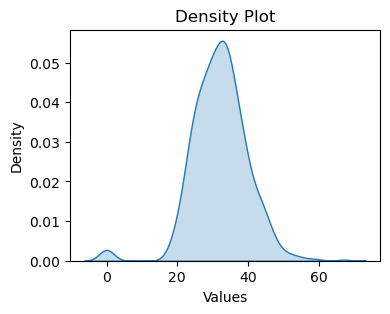

In [56]:
plt.figure(figsize=(4, 3))
sns.kdeplot(df['BMI'], shade=True)
plt.title('Density Plot')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

In [73]:
import numpy
print(numpy.__version__)

1.24.3
